In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
mvp_df_list = []
award_path = '../Basketball Reference Stat Scraper/Awards/MVP/'
for i in os.listdir(award_path):
    # print(f'{award_path}{i}')
    mvp_df_list.append(pd.read_csv(f'{award_path}{i}',index_col=0))

mvp_df = pd.concat(mvp_df_list).reset_index(drop=True)

In [3]:
mvp_df = mvp_df[['Player','Age','Share','Year']].sort_values(['Year','Share'])

In [4]:
player_df_list = []
player_path = '../Basketball Reference Stat Scraper/player_stats/'
for i in os.listdir(player_path):
    # print(f'{award_path}{i}')

    player_df_list.append(pd.read_csv(f'{player_path}{i}',index_col=0))

player_df = pd.concat(player_df_list).sort_values('Year').reset_index(drop=True)

In [5]:
player_df.Player = player_df.Player.str.rstrip('/*')

In [6]:
train = player_df[player_df['Year'] != 2023]
train[train['Player'].str.contains('Kareem')]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
127,Kareem Abdul-Jabbar,C,32,LAL,82,0,38.3,10.2,16.9,0.604,...,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
402,Kareem Abdul-Jabbar,C,33,LAL,80,0,37.2,10.5,18.2,0.574,...,26.3,9.6,4.6,14.3,0.230,4.7,1.4,6.1,6.1,1981
706,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,0.579,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,1982
973,Kareem Abdul-Jabbar,C,35,LAL,79,79,32.3,9.1,15.5,0.588,...,24.6,8.0,2.9,10.9,0.205,4.0,0.5,4.5,4.2,1983
1329,Kareem Abdul-Jabbar,C,36,LAL,80,80,32.8,9.0,15.5,0.578,...,25.1,5.9,3.1,8.9,0.163,2.8,0.2,3.0,3.3,1984
1690,Kareem Abdul-Jabbar,C,37,LAL,79,79,33.3,9.2,15.3,0.599,...,24.3,7.6,3.6,11.2,0.204,3.9,1.2,5.1,4.8,1985
2071,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,0.564,...,26.6,7.6,3.2,10.8,0.197,4.4,1.0,5.4,4.9,1986
2285,Kareem Abdul-Jabbar,C,39,LAL,78,78,31.3,7.2,12.7,0.564,...,22.1,4.5,3.0,7.5,0.148,1.4,0.1,1.6,2.2,1987
2611,Kareem Abdul-Jabbar,C,40,LAL,80,80,28.9,6.0,11.3,0.532,...,21.4,2.6,2.7,5.3,0.111,-0.1,0.1,0.0,1.2,1988
3061,Kareem Abdul-Jabbar,C,41,LAL,74,74,22.9,4.2,8.9,0.475,...,20.1,0.9,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,1989


In [136]:
test = player_df[player_df['Year'] == 2023].reset_index(drop=True)


In [137]:
df = pd.merge(left=train,right=mvp_df,on=['Player','Age','Year'],how='left',indicator=True)

In [138]:
df.Share = df.Share.fillna(0)

In [139]:
df.to_csv('nba_1980_2022.csv')

In [140]:
test.to_csv('nba_2023.csv')

In [141]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year', 'Share', '_merge'],
      dtype='object')

In [143]:
orig_feat_list = ['MP','G','PTS','AST','TOV','TRB','BLK','TS%','BPM','WS']
feat_list = ['MP','G','PTS','AST','TOV','TRB','Age','TS%','PER']
feat_list = ['PTS','AST','STL','BLK','TOV','ORB%','DRB%']
feat_list = ['PTS','AST','TRB','STL','BLK','PF','FG%']


In [144]:
# X_train = df[feat_list]
X_train = df.select_dtypes(include=np.number).drop(columns=['Share'])

y_train = df['Share']


In [145]:
# X_test = test[feat_list]
X_test = test.select_dtypes(include=np.number)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [147]:
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=987)

In [148]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=987)

In [149]:
y_pred = rf_regressor.predict(X_test)

In [150]:
test['Predicted Vote Share'] = y_pred

In [151]:
test = test.sort_values('Predicted Vote Share',ascending=False)

[Text(0.5, 1.0, 'Predicted MVP Voting')]

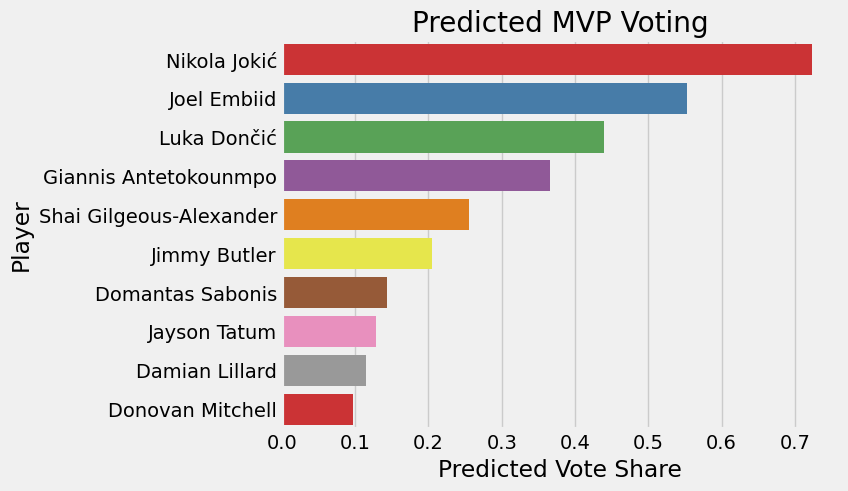

In [152]:
# sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


sns.barplot(data=test.head(10),x='Predicted Vote Share',y='Player',palette='Set1').set(title='Predicted MVP Voting',)

In [153]:
feats = pd.DataFrame([rf_regressor.feature_importances_,X_train.columns]).transpose()
feats.columns = ['Importance','Feature']

[Text(0.5, 1.0, 'Feature Importance')]

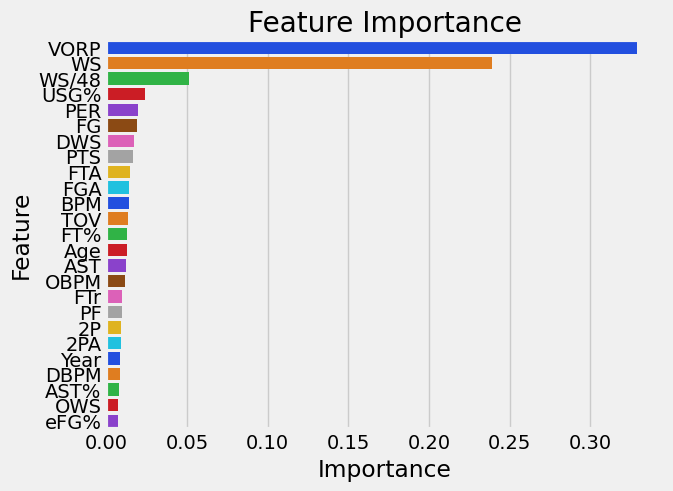

In [154]:
sns.barplot(feats.sort_values('Importance',ascending=False).head(25),x='Importance',y='Feature',palette='bright').set(title='Feature Importance')

<AxesSubplot: >

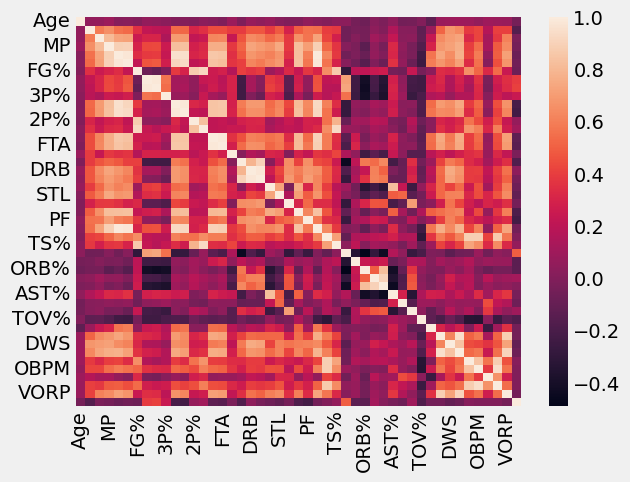

In [31]:
sns.heatmap(X_train.corr())

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

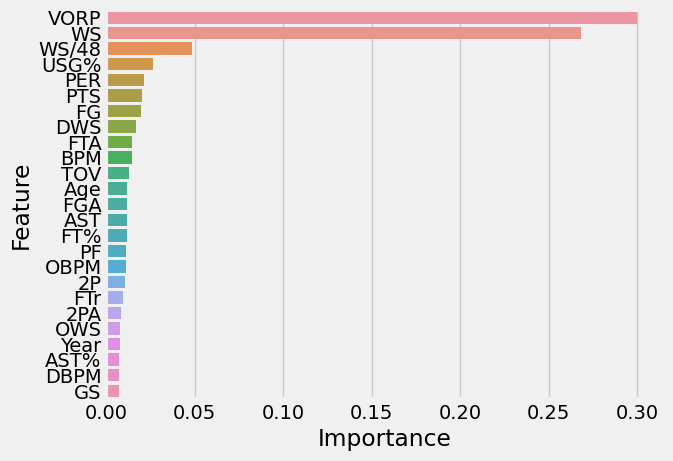

In [59]:
sns.barplot(feats.sort_values('Importance',ascending=False).head(25),x='Importance',y='Feature')

In [58]:
['PTS','eFG%','TRB','PER','BPM','VORP']


for i in X_train.columns:

    abcd = X_train.corr()[i].sort_values(ascending=False)
    efgh = list(abcd[np.abs(abcd) > .85].index)
    efgh.remove(i)

    if len(efgh) == 0:
        pass
    else:
        print(i)
        print(efgh)
        print()

MP
['FGA', 'PTS', 'FG']

FG
['PTS', 'FGA', '2P', '2PA', 'MP', 'FT']

FGA
['PTS', 'FG', '2PA', '2P', 'MP']

FG%
['eFG%', '2P%', 'TS%']

3P
['3PA']

3PA
['3P']

2P
['2PA', 'FG', 'PTS', 'FGA', 'FTA']

2PA
['2P', 'FG', 'FGA', 'PTS', 'FTA']

2P%
['FG%']

eFG%
['TS%', 'FG%']

FT
['FTA', 'PTS', 'FG']

FTA
['FT', 'PTS', '2P', '2PA']

ORB
['TRB']

DRB
['TRB']

TRB
['DRB', 'ORB']

PTS
['FG', 'FGA', '2P', '2PA', 'FT', 'MP', 'FTA']

PER
['OBPM', 'WS/48', 'BPM']

TS%
['eFG%', 'FG%']

DRB%
['TRB%']

TRB%
['DRB%']

OWS
['WS', 'VORP']

WS
['OWS', 'VORP']

WS/48
['PER', 'BPM']

OBPM
['BPM', 'PER']

BPM
['OBPM', 'WS/48', 'PER']

VORP
['WS', 'OWS']



['Year']